In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import foldnorm
from matplotlib import gridspec

In [3]:
! pwd

/Users/matthiaskellner/.zshenv:.:1: no such file or directory: /Users/matthiaskellner/Documents/PhD/DPOSE/Atomistic_experiments/BPNN_model/rust_installation/cargo/env
/Users/matthiaskellner/Documents/PhD/DPOSE/Plots_and_analysis/figure4


/var/folders/7y/yhl65v0j5m3g8zj_xwkzq44w0000gn/T/ipykernel_9725/3238115770.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axs[0, 0].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=OPACITY_UNIT)
/var/folders/7y/yhl65v0j5m3g8zj_xwkzq44w0000gn/T/ipykernel_9725/3238115770.py:91: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axs[1, 1].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)
/var/folders/7y/yhl65v0j5m3g8zj_xwkzq44w0000gn/T/ipykernel_9725/3238115770.py:134: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axs[1, 0].plot(x, x, 'r', linestyle=LINESTYLE_

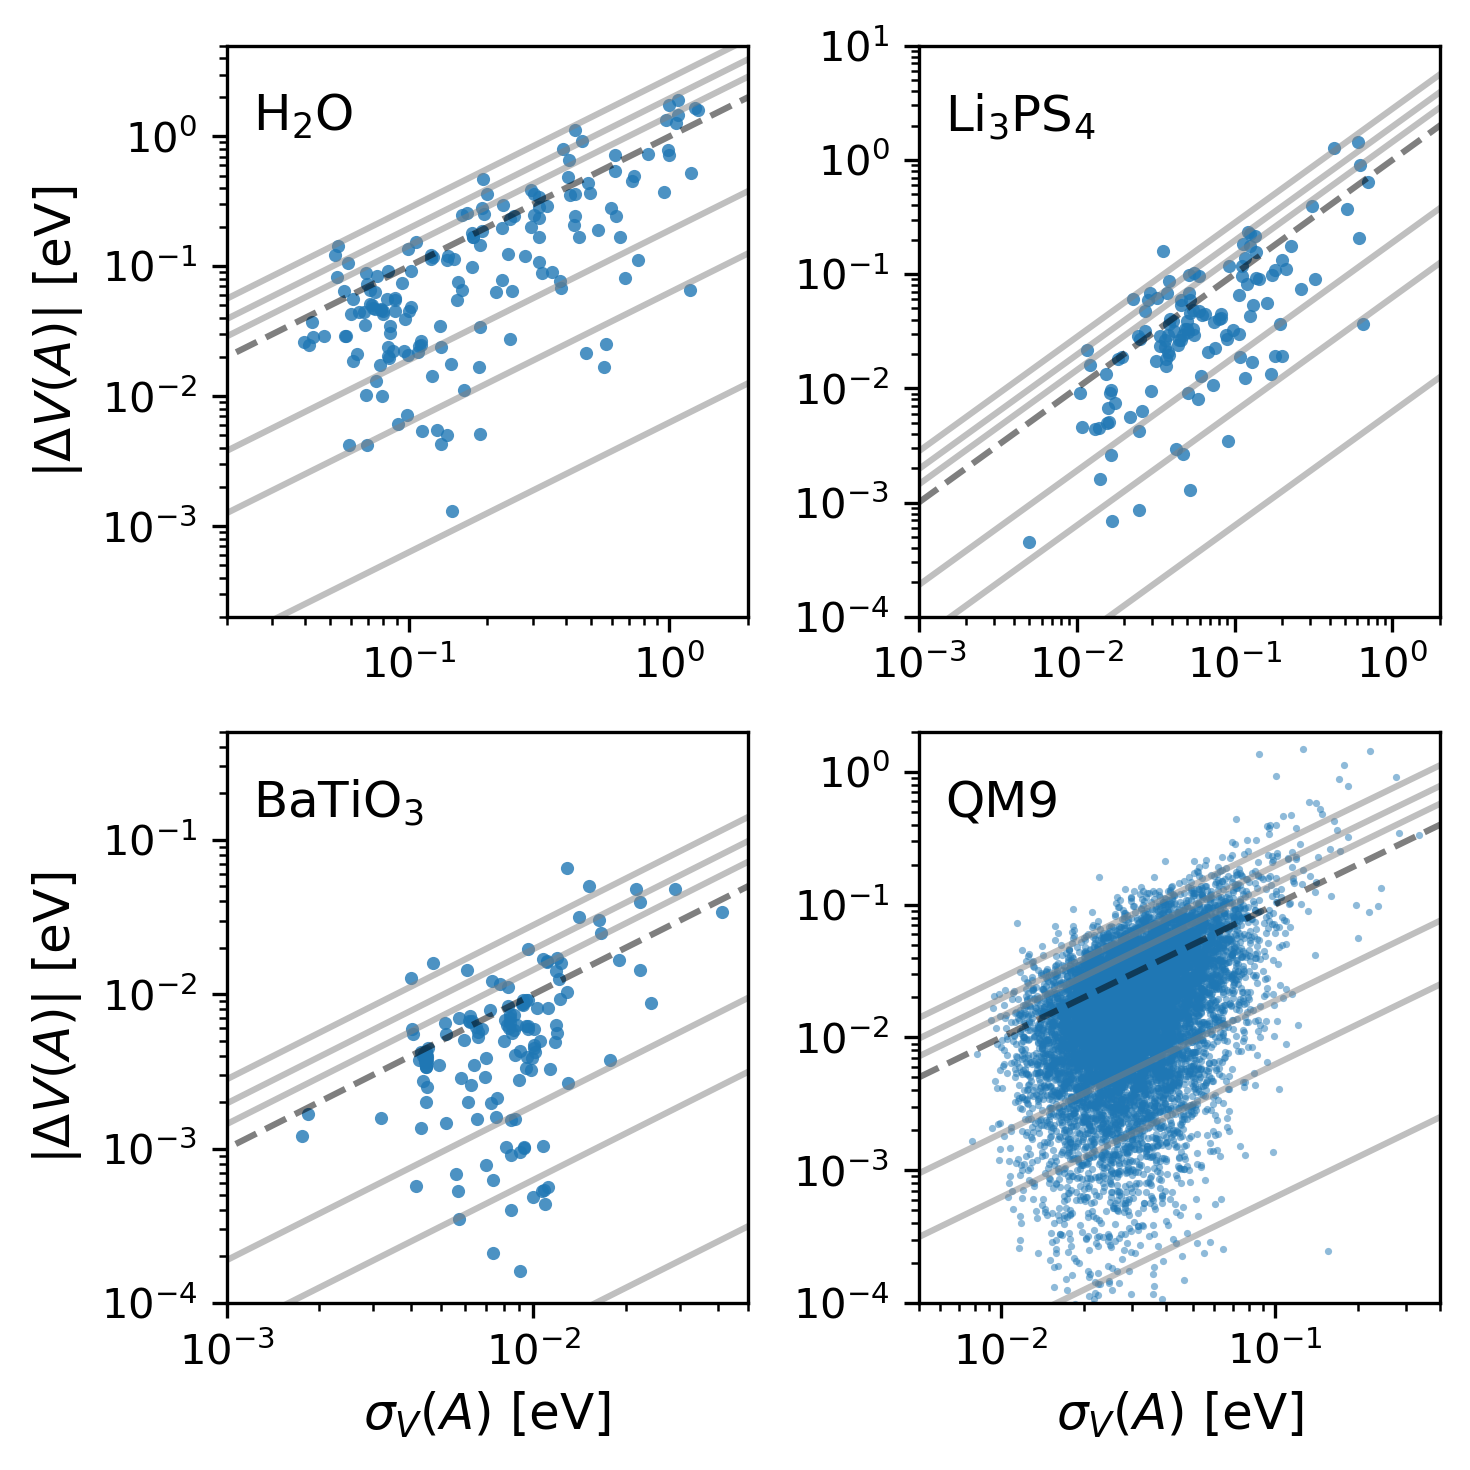

In [11]:



fig, axs = plt.subplots(2, 2, figsize=(5, 5),dpi=300,constrained_layout=True,)
# H2O
x = np.linspace(2e-5, 5e0, 5)


plt.rc('axes', labelsize=12.)
#make the the quantile lines:
x = np.linspace(2e-5, 5e0, 5)
noise_level_2 = np.abs(x)
quantiles_lower_01 = [foldnorm.ppf(0.15, 0.,0.,i) for i in noise_level_2]
quantiles_upper_01 = [foldnorm.ppf(0.85, 0.,0.,i) for i in noise_level_2]
quantiles_lower_05 = [foldnorm.ppf(0.05, 0.,0.,i) for i in noise_level_2]
quantiles_upper_05 = [foldnorm.ppf(0.95, 0.,0.,i) for i in noise_level_2]
quantiles_lower_005 = [foldnorm.ppf(0.005, 0.,0.,i) for i in noise_level_2]
quantiles_upper_005 = [foldnorm.ppf(0.995, 0.,0.,i) for i in noise_level_2]

hartree_to_ev = 27.2114

LINESTYLE_UNIT = '--'
COLOR_UNIT = 'black'
SCATTER_OPACITY = 0.8
OPACITY_UNIT = 0.5

identifier = "../../Atomistic_experiments/materials_model_predictions/H2O/shallow_ens"

# get metrics for H2O
test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten()
test_forces = torch.load(f'{identifier}/test_forces.pt').detach().numpy()
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten()
test_pred_forces = torch.load(f'{identifier}/test_pred_forces.pt').detach().numpy()
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten()

val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten()
val_forces = torch.load(f'./{identifier}/val_forces.pt').detach()
val_pred_energy = torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten()
val_pred_forces = torch.load(f'./{identifier}/val_pred_forces.pt').detach()
val_pred_energy_var = torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()

z_val_split = np.abs(val_energy-val_pred_energy)
alpha = np.sqrt(np.mean(z_val_split**2/val_pred_energy_var, axis=0))

z = np.abs(test_energy- test_pred_energy)

axs[0, 0].scatter(np.sqrt(test_pred_energy_var)*alpha, z, s=10., alpha=SCATTER_OPACITY, rasterized=True, linewidth=0, )
#axs[0, 0].set_title(r'H$_2$O')
#axs[0, 0].set_xlabel(r'$\sigma_{V}$ [eV]')
axs[0, 0].set_ylabel(r'$|\Delta V(A)|$ [eV]')
axs[0, 0].loglog()
axs[0, 0].set_xlim(2e-2, 2e0)
axs[0, 0].set_ylim(2e-4, 5e0)
axs[0, 0].text(0.05, 0.85, r'H$_2$O', fontsize=12, transform=axs[0, 0].transAxes,)

#plot unit line

axs[0, 0].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=OPACITY_UNIT)
axs[0, 0].plot(x, quantiles_upper_05, color='gray', alpha=0.5)
axs[0, 0].plot(x, quantiles_lower_05, color='gray', alpha=0.5)
axs[0, 0].plot(x, quantiles_upper_01, color='gray', alpha=0.5)
axs[0, 0].plot(x, quantiles_lower_01, color='gray', alpha=0.5)
axs[0, 0].plot(x, quantiles_upper_005, color='gray', alpha=0.5)
axs[0, 0].plot(x, quantiles_lower_005, color='gray', alpha=0.5)




# get metrics for QM9

identifier = "../../Atomistic_experiments/materials_model_predictions/QM9/shallow_ens"

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten() * hartree_to_ev
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten() * hartree_to_ev
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten() * hartree_to_ev **2

val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten() * hartree_to_ev
val_pred_energy = torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten()  * hartree_to_ev
val_pred_energy_var = torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()  * hartree_to_ev **2


z_val_split = np.abs(val_energy-val_pred_energy)
alpha = np.sqrt(np.mean(z_val_split**2/val_pred_energy_var, axis=0))

z = np.abs(test_energy- test_pred_energy)


axs[1, 1].scatter(np.sqrt(test_pred_energy_var)*alpha, z, s=3., alpha=0.5, rasterized=True, linewidth=0,)
#axs[1, 1].set_title('QM9')
axs[1, 1].set_xlabel(r'$\sigma_{V}(A)$ [eV]')
#axs[1, 1].set_ylabel(r'$\Delta V$ [eV]')
axs[1, 1].loglog()

axs[1, 1].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)
axs[1, 1].plot(x, quantiles_upper_05, color='gray', alpha=0.5, rasterized=True)
axs[1, 1].plot(x, quantiles_lower_05, color='gray', alpha=0.5, rasterized=True)
axs[1, 1].plot(x, quantiles_upper_01, color='gray', alpha=0.5, rasterized=True)
axs[1, 1].plot(x, quantiles_lower_01, color='gray', alpha=0.5, rasterized=True)
axs[1, 1].plot(x, quantiles_upper_005, color='gray', alpha=0.5, rasterized=True)
axs[1, 1].plot(x, quantiles_lower_005, color='gray', alpha=0.5, rasterized=True)
axs[1, 1].set_xlim(5e-3, 4e-1)
axs[1, 1].set_ylim(1e-4, 2e0)
axs[1, 1].text(0.05, 0.85, 'QM9', fontsize=12, transform=axs[1, 1].transAxes,)




# get metrics for BaTiO3

identifier = "../../Atomistic_experiments/materials_model_predictions/BaTiO3/shallow_ens"

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten()
test_forces = torch.load(f'{identifier}/test_forces.pt').detach().numpy()
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten()
test_pred_forces = torch.load(f'{identifier}/test_pred_forces.pt').detach().numpy()
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten()


# now for validation 
val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten()
val_forces = torch.load(f'{identifier}/val_forces.pt').detach()
val_pred_energy = torch.load(f'{identifier}/val_pred_energy.pt').detach().numpy().flatten()
val_pred_forces = torch.load(f'{identifier}/val_pred_forces.pt').detach()
val_pred_energy_var = torch.load(f'{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()

z_val_split = np.abs(val_energy-val_pred_energy)
alpha = np.sqrt(np.mean(z_val_split**2/val_pred_energy_var, axis=0))

z = np.abs(test_energy- test_pred_energy)

axs[1, 0].scatter(np.sqrt(test_pred_energy_var)*alpha, z, s=10., alpha=SCATTER_OPACITY, rasterized=True, linewidth=0,)
#axs[1, 0].set_title(r'BaTiO$_3$')
axs[1, 0].set_xlabel(r'$\sigma_{V}(A)$ [eV]')
axs[1, 0].set_ylabel(r'$|\Delta V(A)|$ [eV]')
axs[1, 0].loglog()

axs[1, 0].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=OPACITY_UNIT, rasterized=True)
axs[1, 0].plot(x, quantiles_upper_05, color='gray', alpha=0.5, rasterized=True)
axs[1, 0].plot(x, quantiles_lower_05, color='gray', alpha=0.5, rasterized=True)
axs[1, 0].plot(x, quantiles_upper_01, color='gray', alpha=0.5, rasterized=True)
axs[1, 0].plot(x, quantiles_lower_01, color='gray', alpha=0.5, rasterized=True)
axs[1, 0].plot(x, quantiles_upper_005, color='gray', alpha=0.5, rasterized=True)
axs[1, 0].plot(x, quantiles_lower_005, color='gray', alpha=0.5, rasterized=True)

axs[1, 0].set_xlim(1e-3, 5e-2)
axs[1, 0].set_ylim(1e-4, 5e-1)

axs[1, 0].text(0.05, 0.85, r'BaTiO$_3$', fontsize=12, transform=axs[1, 0].transAxes,)
# get metrics for LiPS

identifier = "../../Atomistic_experiments/materials_model_predictions/Li3PS4/shallow_ens"

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten()
test_forces = torch.load(f'{identifier}/test_forces.pt').detach().numpy()
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten()
test_pred_forces = torch.load(f'{identifier}/test_pred_forces.pt').detach().numpy()
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten()


# now for validation 
val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten()
val_forces = torch.load(f'{identifier}/val_forces.pt').detach()
val_pred_energy = torch.load(f'{identifier}/val_pred_energy.pt').detach().numpy().flatten()
val_pred_forces = torch.load(f'{identifier}/val_pred_forces.pt').detach()
val_pred_energy_var = torch.load(f'{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()


z_val_split = np.abs(val_energy-val_pred_energy)
alpha = np.sqrt(np.mean(z_val_split**2/val_pred_energy_var, axis=0))

z = np.abs(test_energy- test_pred_energy)

axs[0, 1].scatter(np.sqrt(test_pred_energy_var)*alpha, z, s=10., alpha=SCATTER_OPACITY, rasterized=True, linewidth=0,)
#axs[0, 1].set_title(r'Li$_3$PS$_4$')
#axs[0, 1].set_xlabel(r'$\sigma_{V}$ [eV]')
#axs[0, 1].set_ylabel(r'$\Delta V$ [eV]')
axs[0, 1].loglog()
axs[0, 1].set_xlim(1e-3, 2e0)
axs[0, 1].set_ylim(1e-4, 1e1)


#plot unit line

axs[0, 1].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=OPACITY_UNIT)
axs[0, 1].plot(x, quantiles_upper_05, color='gray', alpha=0.5, rasterized=True)
axs[0, 1].plot(x, quantiles_lower_05, color='gray', alpha=0.5, rasterized=True)
axs[0, 1].plot(x, quantiles_upper_01, color='gray', alpha=0.5, rasterized=True)
axs[0, 1].plot(x, quantiles_lower_01, color='gray', alpha=0.5, rasterized=True)
axs[0, 1].plot(x, quantiles_upper_005, color='gray', alpha=0.5, rasterized=True)
axs[0, 1].plot(x, quantiles_lower_005, color='gray', alpha=0.5, rasterized=True)

axs[0, 1].text(0.05, 0.85, r'Li$_3$PS$_4$', fontsize=12, transform=axs[0, 1].transAxes,rasterized=True)


# text in first and second line




plt.tight_layout()
plt.savefig('2x2_scatter.pdf', dpi=300, bbox_inches='tight')






In [5]:
percentage_95

NameError: name 'percentage_95' is not defined

In [ ]:
np.sqrt(test_pred_energy_var)[7904]

0.24635501004276847

/var/folders/7y/yhl65v0j5m3g8zj_xwkzq44w0000gn/T/ipykernel_49248/1281706173.py:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)


107
392
10723
2662


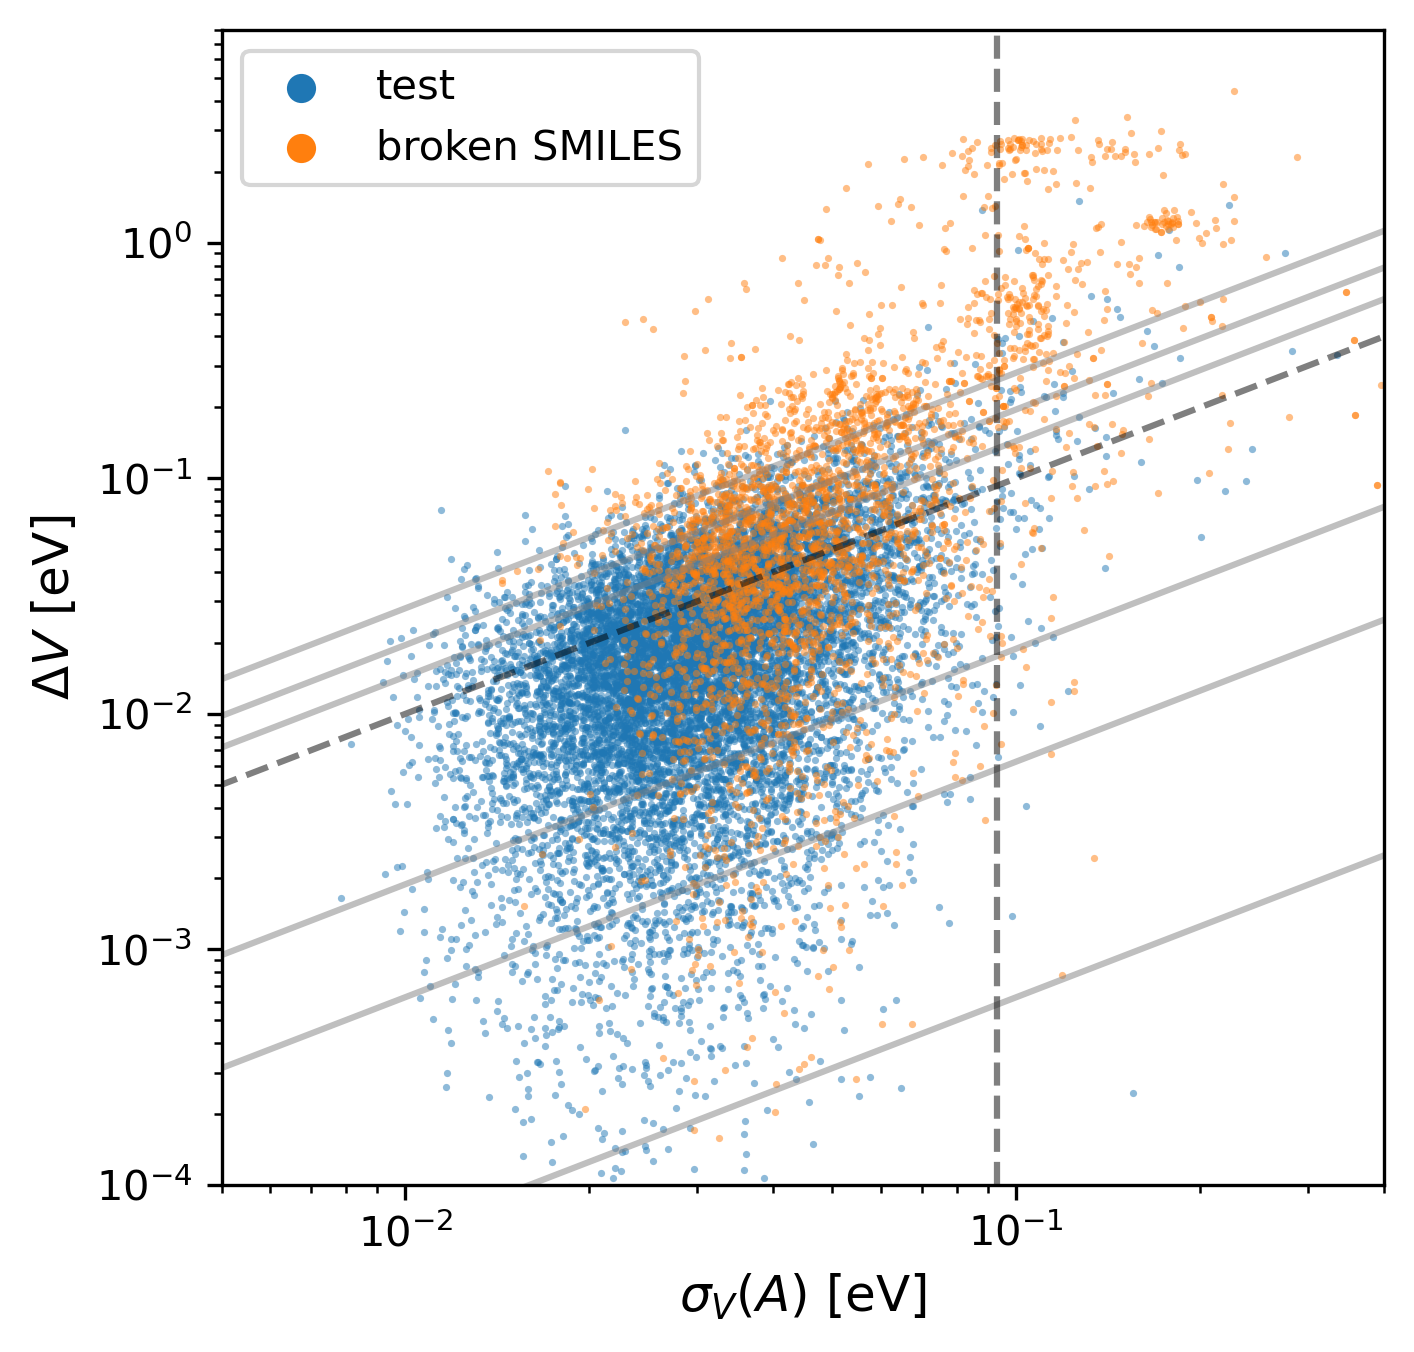

In [ ]:
hartree_to_ev = 27.2114

x = np.linspace(2e-5, 5e0, 5)

LINESTYLE_UNIT = '--'
COLOR_UNIT = 'black'
SCATTER_OPACITY = 0.8
OPACITY_UNIT = 0.5

plt.figure(dpi=300, figsize=(5,5))

plt.rc('axes', labelsize=12.)
#make the the quantile lines:
x = np.linspace(2e-5, 5e0, 5)
noise_level_2 = np.abs(x)
quantiles_lower_01 = [foldnorm.ppf(0.15, 0.,0.,i) for i in noise_level_2]
quantiles_upper_01 = [foldnorm.ppf(0.85, 0.,0.,i) for i in noise_level_2]
quantiles_lower_05 = [foldnorm.ppf(0.05, 0.,0.,i) for i in noise_level_2]
quantiles_upper_05 = [foldnorm.ppf(0.95, 0.,0.,i) for i in noise_level_2]
quantiles_lower_005 = [foldnorm.ppf(0.005, 0.,0.,i) for i in noise_level_2]
quantiles_upper_005 = [foldnorm.ppf(0.995, 0.,0.,i) for i in noise_level_2]

identifier = "../../Atomistic_experiments/materials_model_predictions/QM9/shallow_ens"

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten() * hartree_to_ev
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten() * hartree_to_ev
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten() * hartree_to_ev **2

val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten() * hartree_to_ev
val_pred_energy = torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten()  * hartree_to_ev
val_pred_energy_var = torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()  * hartree_to_ev **2

outlier_energy = torch.load(f'{identifier}/Youtlier_true.pt').detach().numpy().flatten()  * hartree_to_ev
outlier_pred_energy = torch.load(f'{identifier}/Youtlier_pred.pt').detach().numpy().flatten()  * hartree_to_ev
outlier_pred_energy_var = torch.load(f'{identifier}/Youtlier_var_pred.pt').detach().numpy().flatten()  * hartree_to_ev **2

z_val_split = np.abs(val_energy-val_pred_energy)
alpha = np.sqrt(np.mean(z_val_split**2/val_pred_energy_var, axis=0))

z = np.abs(test_energy- test_pred_energy)
z_outlier = np.abs(outlier_energy - outlier_pred_energy)

plt.scatter(np.sqrt(test_pred_energy_var)*alpha, z, s=3., alpha=0.5, rasterized=True, linewidth=0,)
plt.scatter(np.sqrt(outlier_pred_energy_var)*alpha, z_outlier, s=3., alpha=0.5, rasterized=True, linewidth=0,color="tab:orange")
#axs[1, 1].set_title('QM9')

plt.scatter([],[],color="tab:blue",label="test")
plt.scatter([],[],color="tab:orange",label="broken SMILES")
plt.xlabel(r'$\sigma_{V}(A)$ [eV]')
plt.ylabel(r'$\Delta V$ [eV]')
plt.loglog()

plt.plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)
plt.plot(x, quantiles_upper_05, color='gray', alpha=0.5, rasterized=True)
plt.plot(x, quantiles_lower_05, color='gray', alpha=0.5, rasterized=True)
plt.plot(x, quantiles_upper_01, color='gray', alpha=0.5, rasterized=True)
plt.plot(x, quantiles_lower_01, color='gray', alpha=0.5, rasterized=True)
plt.plot(x, quantiles_upper_005, color='gray', alpha=0.5, rasterized=True)
plt.plot(x, quantiles_lower_005, color='gray', alpha=0.5, rasterized=True)
plt.xlim(5e-3, 4e-1)
plt.ylim(1e-4, 8e0)
#plt.text(0.05, 0.85, 'QM9', fontsize=12, transform=axs[1, 1].transAxes,)
plt.legend(loc="upper left")
percentage_99 = round(0.99 * len(test_pred_energy_var))
idx_99 = np.argsort(np.sqrt(test_pred_energy_var))[percentage_99]
val_99 = np.sqrt(test_pred_energy_var)[idx_99] * alpha

plt.axvline(val_99, color='black', linestyle='--', alpha=0.5)


print(np.sum(np.sqrt(test_pred_energy_var) * alpha > val_99))
print(np.sum(np.sqrt(outlier_pred_energy_var) * alpha > val_99))

print(np.sum(np.sqrt(test_pred_energy_var) * alpha < val_99))
print(np.sum(np.sqrt(outlier_pred_energy_var) * alpha < val_99))


/var/folders/7y/yhl65v0j5m3g8zj_xwkzq44w0000gn/T/ipykernel_9725/1294518935.py:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)


107
392
10723
2662


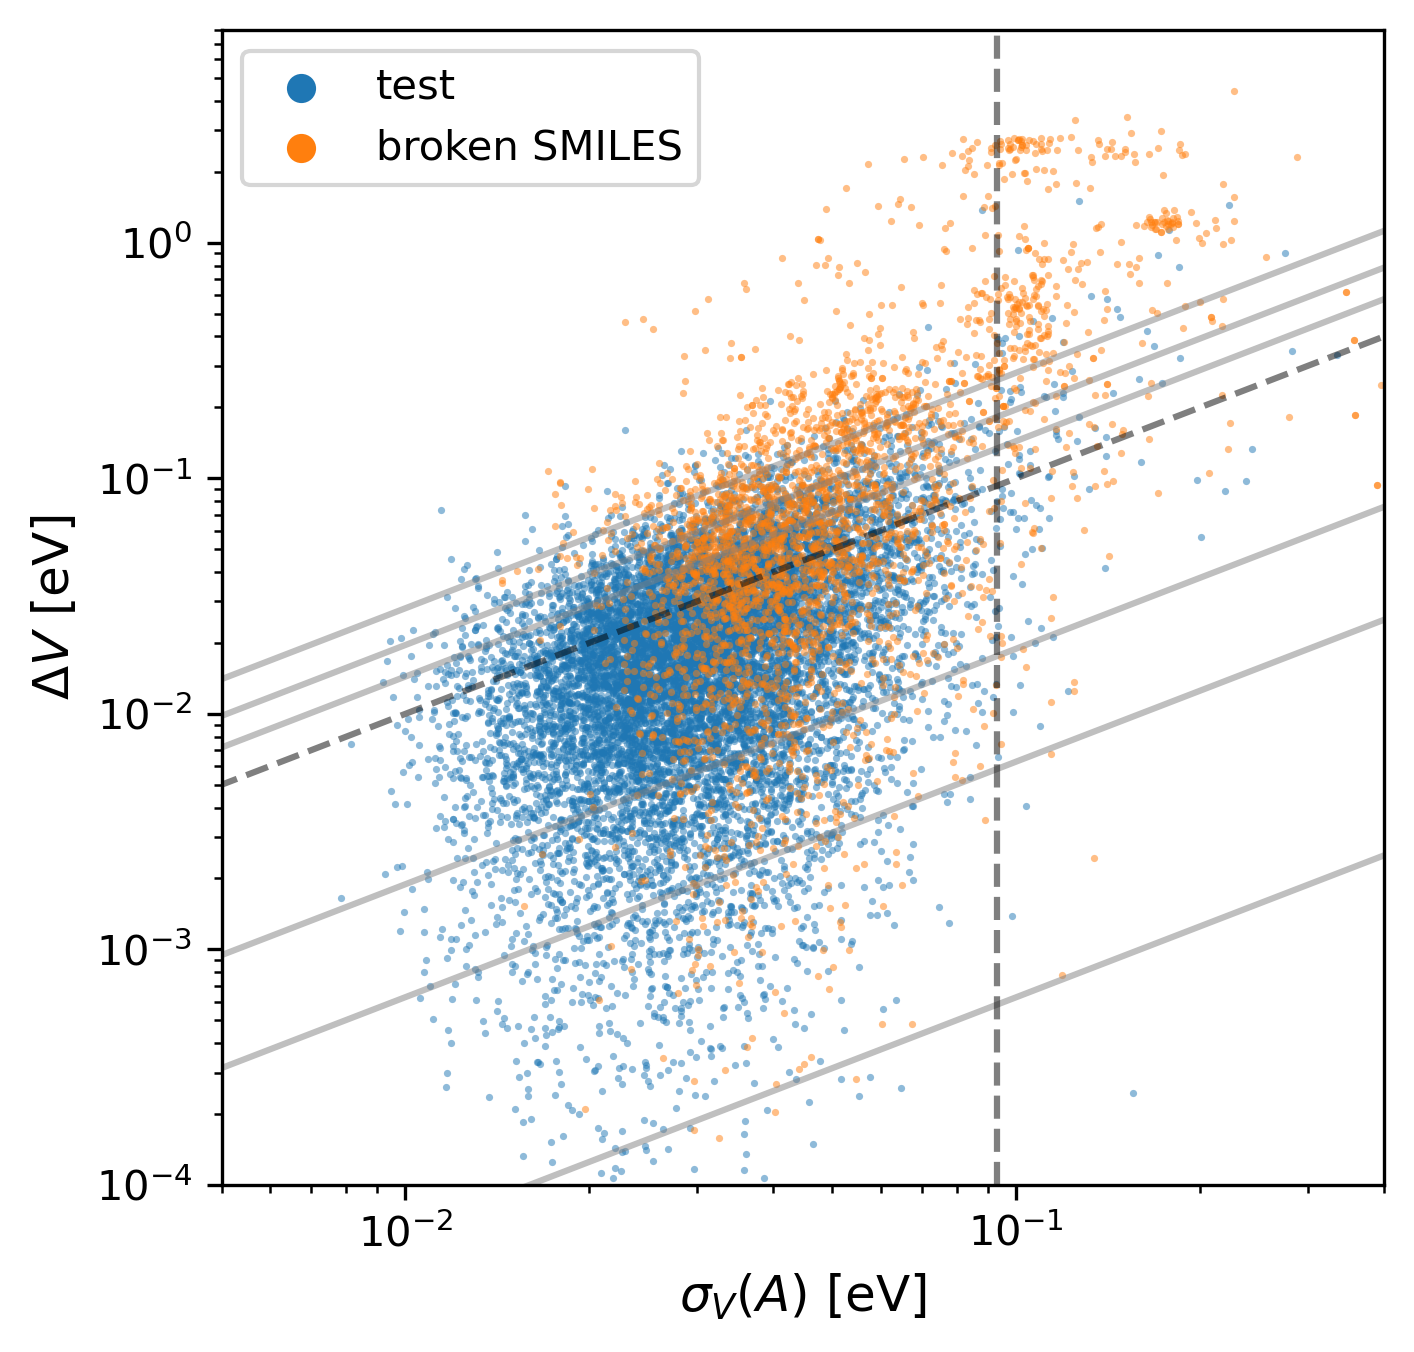

In [10]:
hartree_to_ev = 27.2114

x = np.linspace(2e-5, 5e0, 5)

LINESTYLE_UNIT = '--'
COLOR_UNIT = 'black'
SCATTER_OPACITY = 0.8
OPACITY_UNIT = 0.5

plt.figure(dpi=300, figsize=(5,5))

plt.rc('axes', labelsize=12.)
#make the the quantile lines:
x = np.linspace(2e-5, 5e0, 5)
noise_level_2 = np.abs(x)
quantiles_lower_01 = [foldnorm.ppf(0.15, 0.,0.,i) for i in noise_level_2]
quantiles_upper_01 = [foldnorm.ppf(0.85, 0.,0.,i) for i in noise_level_2]
quantiles_lower_05 = [foldnorm.ppf(0.05, 0.,0.,i) for i in noise_level_2]
quantiles_upper_05 = [foldnorm.ppf(0.95, 0.,0.,i) for i in noise_level_2]
quantiles_lower_005 = [foldnorm.ppf(0.005, 0.,0.,i) for i in noise_level_2]
quantiles_upper_005 = [foldnorm.ppf(0.995, 0.,0.,i) for i in noise_level_2]

identifier = "../../Atomistic_experiments/materials_model_predictions/QM9/shallow_ens"

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten() * hartree_to_ev
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten() * hartree_to_ev
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten() * hartree_to_ev **2

val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten() * hartree_to_ev
val_pred_energy = torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten()  * hartree_to_ev
val_pred_energy_var = torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()  * hartree_to_ev **2

outlier_energy = torch.load(f'{identifier}/Youtlier_true.pt').detach().numpy().flatten()  * hartree_to_ev
outlier_pred_energy = torch.load(f'{identifier}/Youtlier_pred.pt').detach().numpy().flatten()  * hartree_to_ev
outlier_pred_energy_var = torch.load(f'{identifier}/Youtlier_var_pred.pt').detach().numpy().flatten()  * hartree_to_ev **2

z_val_split = np.abs(val_energy-val_pred_energy)
alpha = np.sqrt(np.mean(z_val_split**2/val_pred_energy_var, axis=0))

z = np.abs(test_energy- test_pred_energy)
z_outlier = np.abs(outlier_energy - outlier_pred_energy)

plt.scatter(np.sqrt(test_pred_energy_var)*alpha, z, s=3., alpha=0.5, rasterized=True, linewidth=0,)
plt.scatter(np.sqrt(outlier_pred_energy_var)*alpha, z_outlier, s=3., alpha=0.5, rasterized=True, linewidth=0,color="tab:orange")
#axs[1, 1].set_title('QM9')

plt.scatter([],[],color="tab:blue",label="test")
plt.scatter([],[],color="tab:orange",label="broken SMILES")
plt.xlabel(r'$\sigma_{V}(A)$ [eV]')
plt.ylabel(r'$\Delta V$ [eV]')
plt.loglog()

plt.plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)
plt.plot(x, quantiles_upper_05, color='gray', alpha=0.5, rasterized=True)
plt.plot(x, quantiles_lower_05, color='gray', alpha=0.5, rasterized=True)
plt.plot(x, quantiles_upper_01, color='gray', alpha=0.5, rasterized=True)
plt.plot(x, quantiles_lower_01, color='gray', alpha=0.5, rasterized=True)
plt.plot(x, quantiles_upper_005, color='gray', alpha=0.5, rasterized=True)
plt.plot(x, quantiles_lower_005, color='gray', alpha=0.5, rasterized=True)
plt.xlim(5e-3, 4e-1)
plt.ylim(1e-4, 8e0)
#plt.text(0.05, 0.85, 'QM9', fontsize=12, transform=axs[1, 1].transAxes,)
plt.legend(loc="upper left")
percentage_99 = round(0.99 * len(test_pred_energy_var))
idx_99 = np.argsort(np.sqrt(test_pred_energy_var))[percentage_99]
val_99 = np.sqrt(test_pred_energy_var)[idx_99] * alpha

plt.axvline(val_99, color='black', linestyle='--', alpha=0.5)


print(np.sum(np.sqrt(test_pred_energy_var) * alpha > val_99))
print(np.sum(np.sqrt(outlier_pred_energy_var) * alpha > val_99))

print(np.sum(np.sqrt(test_pred_energy_var) * alpha < val_99))
print(np.sum(np.sqrt(outlier_pred_energy_var) * alpha < val_99))

/var/folders/7y/yhl65v0j5m3g8zj_xwkzq44w0000gn/T/ipykernel_22154/955534407.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)


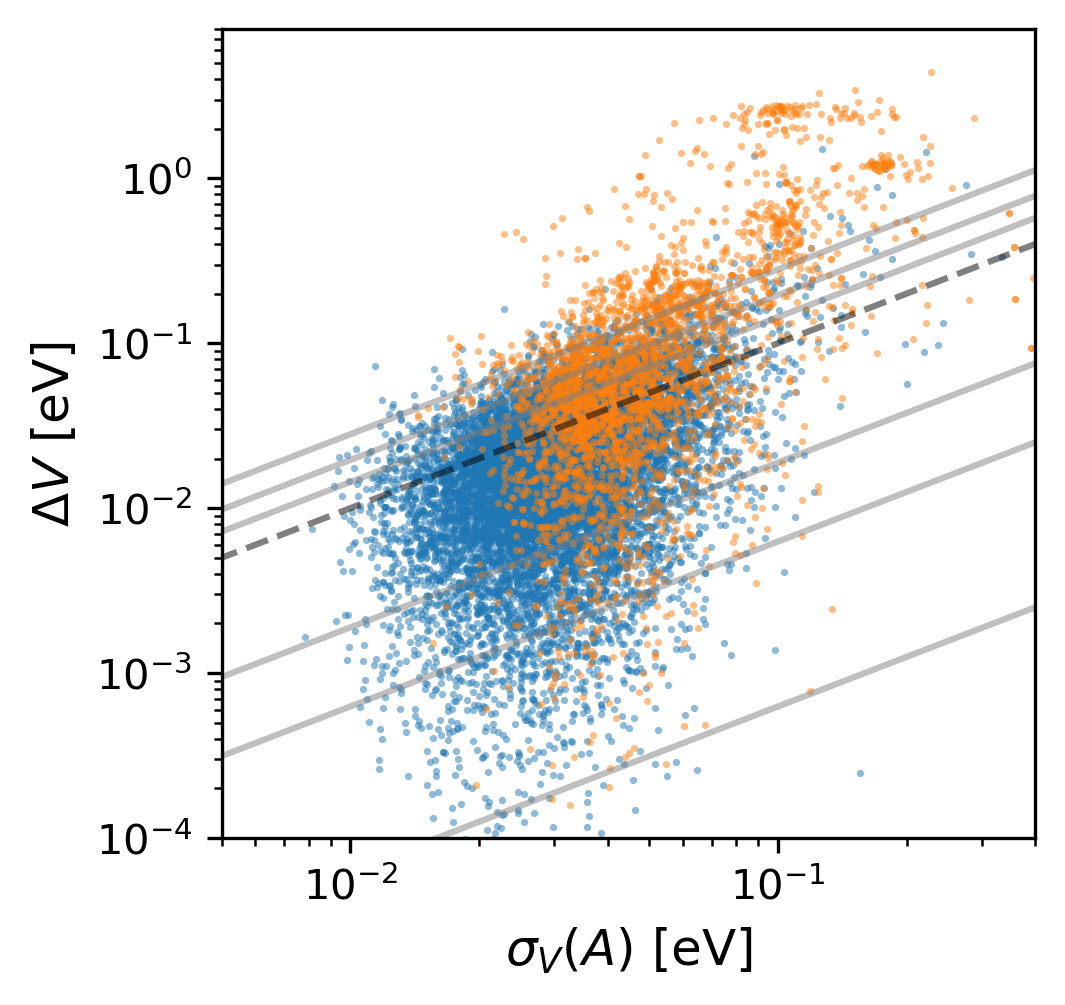

In [ ]:
hartree_to_ev = 27.2114

x = np.linspace(2e-5, 5e0, 5)

LINESTYLE_UNIT = '--'
COLOR_UNIT = 'black'
SCATTER_OPACITY = 0.8
OPACITY_UNIT = 0.5

plt.figure(dpi=300, figsize=(3.5,3.5))

plt.rc('axes', labelsize=12.)
#make the the quantile lines:
x = np.linspace(2e-5, 8e0, 5)
noise_level_2 = np.abs(x)
quantiles_lower_01 = [foldnorm.ppf(0.15, 0.,0.,i) for i in noise_level_2]
quantiles_upper_01 = [foldnorm.ppf(0.85, 0.,0.,i) for i in noise_level_2]
quantiles_lower_05 = [foldnorm.ppf(0.05, 0.,0.,i) for i in noise_level_2]
quantiles_upper_05 = [foldnorm.ppf(0.95, 0.,0.,i) for i in noise_level_2]
quantiles_lower_005 = [foldnorm.ppf(0.005, 0.,0.,i) for i in noise_level_2]
quantiles_upper_005 = [foldnorm.ppf(0.995, 0.,0.,i) for i in noise_level_2]

identifier = "../../Atomistic_experiments/materials_model_predictions/QM9/shallow_ens"

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten() * hartree_to_ev
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten() * hartree_to_ev
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten() * hartree_to_ev **2

val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten() * hartree_to_ev
val_pred_energy = torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten()  * hartree_to_ev
val_pred_energy_var = torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()  * hartree_to_ev **2

outlier_energy = torch.load(f'{identifier}/Youtlier_true.pt').detach().numpy().flatten()  * hartree_to_ev
outlier_pred_energy = torch.load(f'{identifier}/Youtlier_pred.pt').detach().numpy().flatten()  * hartree_to_ev
outlier_pred_energy_var = torch.load(f'{identifier}/Youtlier_var_pred.pt').detach().numpy().flatten()  * hartree_to_ev **2

z_val_split = np.abs(val_energy-val_pred_energy)
alpha = np.sqrt(np.mean(z_val_split**2/val_pred_energy_var, axis=0))

z = np.abs(test_energy- test_pred_energy)
z_outlier = np.abs(outlier_energy - outlier_pred_energy)

plt.scatter(np.sqrt(test_pred_energy_var)*alpha, z, s=3., alpha=0.5, rasterized=True, linewidth=0,)
plt.scatter(np.sqrt(outlier_pred_energy_var)*alpha, z_outlier, s=3., alpha=0.5, rasterized=True, linewidth=0,color="tab:orange")
#axs[1, 1].set_title('QM9')
plt.xlabel(r'$\sigma_{V}(A)$ [eV]')
plt.ylabel(r'$\Delta V$ [eV]')
plt.loglog()

plt.plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)
plt.plot(x, quantiles_upper_05, color='gray', alpha=0.5, rasterized=True)
plt.plot(x, quantiles_lower_05, color='gray', alpha=0.5, rasterized=True)
plt.plot(x, quantiles_upper_01, color='gray', alpha=0.5, rasterized=True)
plt.plot(x, quantiles_lower_01, color='gray', alpha=0.5, rasterized=True)
plt.plot(x, quantiles_upper_005, color='gray', alpha=0.5, rasterized=True)
plt.plot(x, quantiles_lower_005, color='gray', alpha=0.5, rasterized=True)
plt.xlim(5e-3, 4e-1)
plt.ylim(1e-4, 8e0)

#plt.text(0.05, 0.85, 'QM9', fontsize=12, transform=axs[1, 1].transAxes,)

percentage_99 = round(0.99 * len(test_pred_energy_var))
idx_99 = np.argsort(np.sqrt(test_pred_energy_var))[percentage_99]
val_99 = np.sqrt(test_pred_energy_var)[idx_99] * alpha

#plt.axvline(val_99, color='black', linestyle='--', alpha=0.5)

In [16]:
import pandas as pd
import seaborn as sns

In [17]:
data_set_1 = np.sqrt(test_pred_energy_var)*alpha
data_set_2 = np.sqrt(outlier_pred_energy_var)*alpha

labels_1 = ['in-distribution'] * len(data_set_1)
labels_2 = ['broken-SMILES'] * len(data_set_2)

# Combine data sets and labels
combined_data = np.concatenate([data_set_1, data_set_2])
combined_labels = labels_1 + labels_2

# Create DataFrame
df = pd.DataFrame({
    'Value': combined_data,
    'Label': combined_labels
})

In [18]:
from matplotlib import gridspec

In [103]:
import pandas as pd

# Define the path to your file
file_path = 'uncharacterized.txt'

# Load the data, skipping initial non-relevant lines and setting the delimiter
# Assuming the table starts at line 6 (you might need to adjust this)
data = pd.read_csv(file_path, delimiter=r"\s{2,}", engine='python', header=None)

# Renaming the columns for easier access (optional)
data.columns = ['Index', 'GDB17_SMILES', 'B3LYP_XYZ_SMILES', 'Corina_XYZ_SMILES', 'D_IJ']

data = data.drop(data.index[-1])
# Now the dataframe 'data' will have the columns for SMILES strings among others
data["B3LYP_XYZ_SMILES"] = data["B3LYP_XYZ_SMILES"].astype(str)

contains_period = data["B3LYP_XYZ_SMILES"].str.contains('\.', regex=True)

# Convert the pandas Series to a NumPy boolean array
contains_period_array = contains_period.to_numpy()

/var/folders/7y/yhl65v0j5m3g8zj_xwkzq44w0000gn/T/ipykernel_9725/1068041326.py:72: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax0.plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)


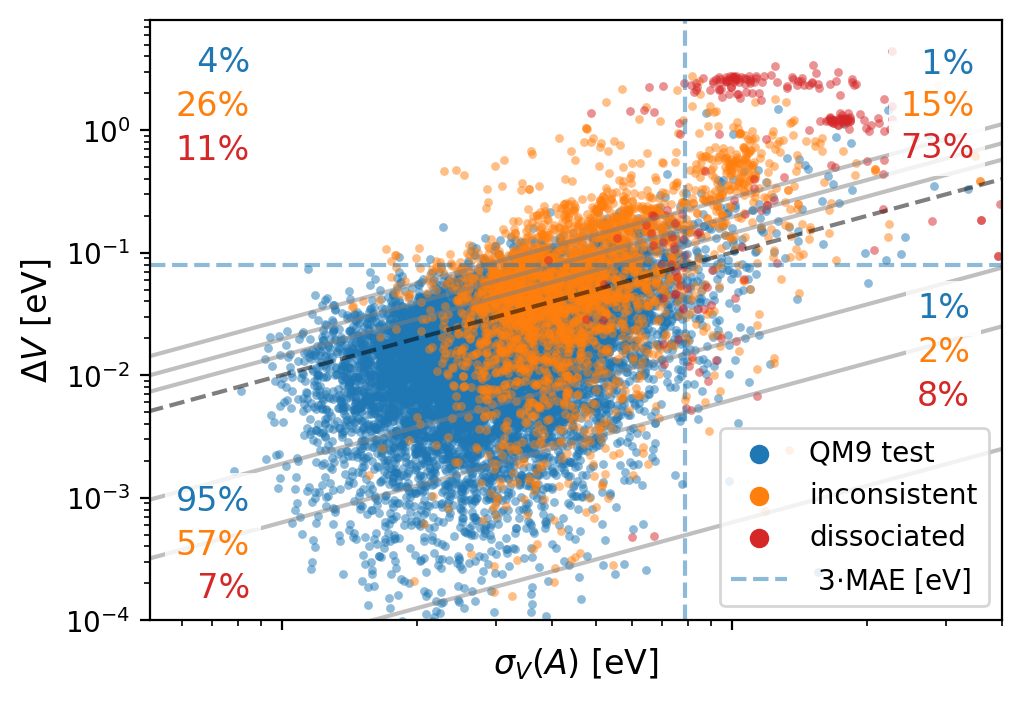

In [164]:
hartree_to_ev = 27.2114
plt.rc('axes', labelsize=12.)
fig = plt.figure(figsize=(5.5,6.5),dpi=200)
gs = gridspec.GridSpec(3, 1, height_ratios=[3., 1, 1]) 

ax0 = plt.subplot(gs[0])
#ax1 = plt.subplot(gs[1], sharex = ax0)
#ax2 = plt.subplot(gs[2], sharex = ax1)


plt.setp(ax0.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

yticks = ax2.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

x = np.linspace(2e-5, 5e0, 5)

LINESTYLE_UNIT = '--'
COLOR_UNIT = 'black'
SCATTER_OPACITY = 0.8
OPACITY_UNIT = 0.3

SCATTER_SIZE = 10.

#make the the quantile lines:
x = np.linspace(2e-5, 8e0, 5)
noise_level_2 = np.abs(x)
quantiles_lower_01 = [foldnorm.ppf(0.15, 0.,0.,i) for i in noise_level_2]
quantiles_upper_01 = [foldnorm.ppf(0.85, 0.,0.,i) for i in noise_level_2]
quantiles_lower_05 = [foldnorm.ppf(0.05, 0.,0.,i) for i in noise_level_2]
quantiles_upper_05 = [foldnorm.ppf(0.95, 0.,0.,i) for i in noise_level_2]
quantiles_lower_005 = [foldnorm.ppf(0.005, 0.,0.,i) for i in noise_level_2]
quantiles_upper_005 = [foldnorm.ppf(0.995, 0.,0.,i) for i in noise_level_2]

identifier = "../../Atomistic_experiments/materials_model_predictions/QM9/shallow_ens"

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten() * hartree_to_ev
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten() * hartree_to_ev
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten() * hartree_to_ev **2

val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten() * hartree_to_ev
val_pred_energy = torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten()  * hartree_to_ev
val_pred_energy_var = torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()  * hartree_to_ev **2

outlier_energy = torch.load(f'{identifier}/Youtlier_true.pt').detach().numpy().flatten()  * hartree_to_ev
outlier_pred_energy = torch.load(f'{identifier}/Youtlier_pred.pt').detach().numpy().flatten()  * hartree_to_ev
outlier_pred_energy_var = torch.load(f'{identifier}/Youtlier_var_pred.pt').detach().numpy().flatten()  * hartree_to_ev **2

z_val_split = np.abs(val_energy-val_pred_energy)
alpha = np.sqrt(np.mean(z_val_split**2/val_pred_energy_var, axis=0))

z = np.abs(test_energy- test_pred_energy)
z_outlier = np.abs(outlier_energy - outlier_pred_energy)

rmse_test = np.sqrt(np.mean(z.flatten()**2))
rmse_outlier = np.sqrt(np.mean(z_outlier.flatten()**2))

mae_test = np.mean(z.flatten())
mae_outlier = np.mean(z_outlier.flatten())

ax0.scatter(np.sqrt(test_pred_energy_var)*alpha, z, s=SCATTER_SIZE, alpha=0.5, rasterized=True, linewidth=0,)
ax0.scatter(np.sqrt(outlier_pred_energy_var[~contains_period])*alpha, z_outlier[~contains_period], s=SCATTER_SIZE, alpha=0.5, rasterized=True, linewidth=0,color="tab:orange")
ax0.scatter(np.sqrt(outlier_pred_energy_var[contains_period])*alpha, z_outlier[contains_period], s=SCATTER_SIZE, alpha=0.5, rasterized=True, linewidth=0,color="tab:red")
#axs[1, 1].set_title('QM9')
#ax1.set_xlabel(r'$\sigma_{V}(A)$ [eV]')
ax0.set_ylabel(r'$\Delta V$ [eV]')
ax0.loglog()

ax0.plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)
ax0.plot(x, quantiles_upper_05, color='gray', alpha=0.5, rasterized=True)
ax0.plot(x, quantiles_lower_05, color='gray', alpha=0.5, rasterized=True)
ax0.plot(x, quantiles_upper_01, color='gray', alpha=0.5, rasterized=True)
ax0.plot(x, quantiles_lower_01, color='gray', alpha=0.5, rasterized=True)
ax0.plot(x, quantiles_upper_005, color='gray', alpha=0.5, rasterized=True)
ax0.plot(x, quantiles_lower_005, color='gray', alpha=0.5, rasterized=True)
ax0.set_xlim(5.1e-3, 4e-1)
ax0.set_ylim(1e-4, 8e0)

ax0.scatter([],[],color="tab:blue",label="QM9 test")
ax0.scatter([],[],color="tab:orange",label="inconsistent")
ax0.scatter([],[],color="tab:red",label="dissociated")



#plt.text(0.05, 0.85, 'QM9', fontsize=12, transform=axs[1, 1].transAxes,)
ax1.set_xlim(5.1e-3, 4e-1)

percentage_99 = round(0.99 * len(test_pred_energy_var))
idx_99 = np.argsort(np.sqrt(test_pred_energy_var))[percentage_99]
val_99 = np.sqrt(test_pred_energy_var)[idx_99] * alpha

#plt.axvline(val_99, color='black', linestyle='--', alpha=0.5)
sns.histplot(df, x='Value', hue="Label", fill=True, log_scale=True, ax=ax1, legend=False)

sns.kdeplot(df, x='Value', hue="Label",
    multiple="fill",log_scale=True, bw_adjust=2, ax=ax2, legend=False, alpha=0.3, linewidth=0.5)

#ax2.set_xlim(5.1e-3, 4e-1)

#ax1.set_ylabel("count")
#ax2.set_ylabel("p(broken)")

#ax2.set_xlabel(r'$\sigma_{V}(A)$ [eV]')

#ax0.text(0.05, 0.9, 'a)', fontsize=12, transform=ax0.transAxes)
#ax1.text(0.05, 0.75, 'b)', fontsize=12, transform=ax1.transAxes)
#ax2.text(0.05, 0.75, 'c)', fontsize=12, transform=ax2.transAxes)

#ax2.axvline(mae_test, color='tab:blue', linestyle='--', alpha=0.5)
#ax2.axvline(mae_test*2, color='tab:blue', linestyle='--', alpha=0.5)
#ax2.axvline(mae_test*3, color='tab:blue', linestyle='--', alpha=0.5)

#ax1.axvline(mae_test, color='tab:blue', linestyle='--', alpha=0.5)
#ax1.axvline(mae_test*2, color='tab:blue', linestyle='--', alpha=0.5)
#ax1.axvline(mae_test*3, color='tab:blue', linestyle='--', alpha=0.5)

ax0.axvline(mae_test*3, color='tab:blue', linestyle='--', alpha=0.5, label=r" 3$\cdot$MAE [eV]")
ax0.axhline(mae_test*3, color='tab:blue', linestyle='--', alpha=0.5)

#ax0.axvline(mae_test*2, color='tab:blue', linestyle='--', alpha=0.5)
#ax0.axhline(mae_test*2, color='tab:blue', linestyle='--', alpha=.5)

#ax0.axvline(mae_test, color='tab:blue', linestyle='--', alpha=.5)
#ax0.axhline(mae_test, color='tab:blue', linestyle='--', alpha=.5)
#fig.tight_layout()

N_tot = len(z) + len(z_outlier)

frac_right_upper_quadrant_test = len(z[(z>mae_test*3) & ((np.sqrt(test_pred_energy_var)*alpha)>(mae_test*3))])/len(z)*100
frac_right_upper_quadrant_outlier = len(z_outlier[(z_outlier>mae_test*3) & ((np.sqrt(outlier_pred_energy_var)*alpha)>(mae_test*3))])/len(z_outlier)*100
frac_right_upper_quadrant_dissociated = len(z_outlier[contains_period_array][(z_outlier[contains_period_array]>mae_test*3) & ((np.sqrt(outlier_pred_energy_var[contains_period_array])*alpha)>(mae_test*3))])/len(z_outlier[contains_period_array])*100

frac_left_upper_quadrant_test = len(z[(z>mae_test*3) & ((np.sqrt(test_pred_energy_var)*alpha)<(mae_test*3))])/len(z)*100
frac_left_upper_quadrant_outlier = len(z_outlier[(z_outlier>mae_test*3) & ((np.sqrt(outlier_pred_energy_var)*alpha)<(mae_test*3))])/len(z_outlier)*100
frac_left_upper_quadrant_dissociated = len(z_outlier[contains_period_array][(z_outlier[contains_period_array]>mae_test*3) & ((np.sqrt(outlier_pred_energy_var[contains_period_array])*alpha)<(mae_test*3))])/len(z_outlier[contains_period_array])*100


frac_left_lower_quadrant_test = len(z[(z<mae_test*3) & ((np.sqrt(test_pred_energy_var)*alpha)<(mae_test*3))])/len(z)*100
frac_left_lower_quadrant_outlier = len(z_outlier[(z_outlier<mae_test*3) & ((np.sqrt(outlier_pred_energy_var)*alpha)<(mae_test*3))])/len(z_outlier)*100
frac_left_lower_quadrant_dissociated = len(z_outlier[contains_period_array][(z_outlier[contains_period_array]<mae_test*3) & ((np.sqrt(outlier_pred_energy_var[contains_period_array])*alpha)<(mae_test*3))])/len(z_outlier[contains_period_array])*100

frac_right_lower_quadrant_test = len(z[(z<mae_test*3) & ((np.sqrt(test_pred_energy_var)*alpha)>(mae_test*3))])/len(z)*100
frac_right_lower_quadrant_outlier = len(z_outlier[(z_outlier<mae_test*3) & ((np.sqrt(outlier_pred_energy_var)*alpha)>(mae_test*3))])/len(z_outlier)*100
frac_right_lower_quadrant_dissociated = len(z_outlier[contains_period_array][(z_outlier[contains_period_array]<mae_test*3) & ((np.sqrt(outlier_pred_energy_var[contains_period_array])*alpha)>(mae_test*3))])/len(z_outlier[contains_period_array])*100


colorparams = dict(facecolor='white', alpha=0.8, linewidth=0)

a = 0.88
b = 0.03

ax0.text(b, a + 0.033, f'  {frac_left_upper_quadrant_test:.0f}%', fontsize=12, c="tab:blue", transform=ax0.transAxes, bbox=colorparams)
ax0.text(b, a - 0.04, f'{frac_left_upper_quadrant_outlier:.0f}%', fontsize=12, c="tab:orange", transform=ax0.transAxes, bbox=colorparams)
ax0.text(b, a - 0.113, f'{frac_left_upper_quadrant_dissociated:.0f}%', fontsize=12, c="tab:red", transform=ax0.transAxes, bbox=colorparams)

a = 0.88
b = .88
ax0.text(b,  a + 0.03, f'  {frac_right_upper_quadrant_test:.0f}%', c="tab:blue", fontsize=12, transform=ax0.transAxes, bbox=colorparams)
ax0.text(b, a - 0.04, f'{frac_right_upper_quadrant_outlier:.0f}%', c="tab:orange", fontsize=12, transform=ax0.transAxes, bbox=colorparams)
ax0.text(b, a - 0.11, f'{frac_right_upper_quadrant_dissociated:.0f}%', c="tab:red", fontsize=12, transform=ax0.transAxes, bbox=colorparams)

b = 0.90
a = 0.47

ax0.text(b, a + 0.033, f'{frac_right_lower_quadrant_test:.0f}%', c="tab:blue", fontsize=12, transform=ax0.transAxes, bbox=colorparams)
ax0.text(b, a - 0.04, f'{frac_right_lower_quadrant_outlier:.0f}%', c="tab:orange", fontsize=12, transform=ax0.transAxes, bbox=colorparams)
ax0.text(b, a - 0.113, f'{frac_right_lower_quadrant_dissociated:.0f}%', c="tab:red", fontsize=12, transform=ax0.transAxes, bbox=colorparams)

a = 0.15
b = 0.03

ax0.text(b, a + 0.033, f'{frac_left_lower_quadrant_test:.0f}%', c="tab:blue", fontsize=12, transform=ax0.transAxes, bbox=colorparams)
ax0.text(b, a - 0.04, f'{frac_left_lower_quadrant_outlier:.0f}%', c="tab:orange", fontsize=12, transform=ax0.transAxes, bbox=colorparams)
ax0.text(b, a - 0.113, f'  {frac_left_lower_quadrant_dissociated:.0f}%', c="tab:red", fontsize=12, transform=ax0.transAxes, bbox=colorparams)

ax0.set_xlabel(r'$\sigma_{V}(A)$ [eV]')

ax0.legend(loc="lower right")
#fig.show()

fig.savefig("QM9_OOD.pdf", bbox_inches='tight')
